In [42]:
import pandas as pd

# Data Cleaning and preprocessing 
import numpy as np
import re
from wordcloud import STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
import empiricaldist as emd
import plotly.express as px
from wordcloud import WordCloud

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
personality = pd.read_csv('mbti_1.csv')

In [6]:
personality = pd.read_csv('/content/drive/MyDrive/mbti_1.csv')

In [3]:
personality.head()
# we notice links in the dataset

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  You're fired.|||That's another silly misconcep...

## Missing Values Check

In [4]:
personality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


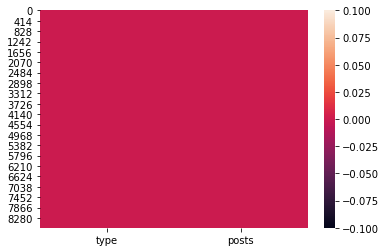

In [5]:
# heatmap to check for missing value (found nothing)
sns.heatmap(personality.isnull(),cbar=True)

## Consistency check

In [6]:
personality.type.unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [7]:
len(personality.type.unique())
# as expected, we have 16 unique personalities.

16

## Duplicates check

In [8]:
dup = personality.duplicated()

In [9]:
personality[dup]
# seems like there are also no duplicates

Empty DataFrame
Columns: [type, posts]
Index: []

## FURTHER CLEANING

## Removing Links

In [10]:
# As mentioned abeve we noticed links so now we'll remove the links since majority are youtube links we're
# assuming that in some cases the links are like an addition to some topic being talked about so the text 
# itself is enough.

In [11]:
# finding regex to remove links
link = '''Welp, I think this is finally the week that I'm going to tell my manager that I'm done.  
've paid off all of my debt, my secondary savings have hit the point where I can live off of that for 
the...|||So, he avoided you over the weekend and now you plan on waiting for him to make the next move? 
Good luck with that.|||Trying to explain computer related things to computer illiterate people is painful. 
I took the day off and asked someone in my section to run a couple of data mining reports that I have to
run...|||Probably my favorite band of all time.   https://youtu.be/7rlkSNUgr3I|||The guy is a red-blooded
human male.  He was probably trying to impress you because he liked you and then you turned on him.  
You seemed to have taken the ENTJ's word over his from the start and...|||*Pique  
https://youtu.be/7XvD1QN3enQ|||I don't reply to texts saying I hope you had a good day or things of the 
sort either.  You didn't say anything that warrants a conversation and you didn't ask a question requiring
an answer.   To...|||I dabble in video games:  http://i.imgur.com/mzCYWqD.jpg|||
http://i.imgur.com/dPfVzIz.gif|||Definitely!  Words can't describe how much I dislike my current job and 
knowing that my escape plan is indeed a viable plan makes me a happy camper.|||So, I got accepted into
the post-bacc Computer Science program I applied for!    My friends at work thought I was joking when I
said I was done with my current job, but I was completely serious. ...|||.|||The last song I listened to
in 2015    https://youtu.be/-jou7uYu5Wo|||https://youtu.be/7XvD1QN3enQ|||https://youtu.be/TX_5UZHzuJk|||
You should probably talk to someone about this unresolved resentment you seem to be suppressing.
||Breakfast - Cheesy grits with shredded chicken  http://i.imgur.com/wtSawi3.jpg  Lunch - Rice with 
baked shredded chicken  http://i.imgur.com/q29k7LE.jpg  Dinner - Cinnamon toast and...|||Small uninhabited
island.  I love seafood and the beach and I hate humans.  Seems perfect.  :D|||Full disclosure: 
I'm totally in love with the flute player.  Also, NPR + good music = happy camper  
https://youtu.be/mVJjmyFfuts|||This is relevant to my interests.  Super Mario RPG Legend of Zelda:
A Link to the Past Legend of Zelda: Link's Awakening  3D Dot Game Heroes Trip World Shadowrun 
www.youtube.com/watch?v=2o5FHtUaKNQ www.youtube.com/watch?v=2o5FHtUaKNQ
(Genesis) Demon's Souls ...|||When I encounter mindless conformity, my first reaction tends to be
:  https://http://i.imgur.com/sbIl5V1.gif|||-Bowl of Honey Bunches of Oats -Turkey-burger 
-Seasoned imitation crab meat -2 pieces of tilapia|||More like this:  http:youtube.com/watch?v=KAveNvDnL_A youtube.com  
ftp://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSu4UbRLyqK4oBpcGTZUEGMR9oD-Z63lMlnGYyMD1LWbCdyoxe6|||https://38.media.tumblr.com/1d8dbff1367d80ddf797023b13f57d11/tumblr_n9dija4Q521qzi1jyo1_400.gif|||You look like a slightly happier version of Aubrey Plaza.|||So, care less then.  #ICouldn'tCareLess|||Seems like it would be pretty tough to stick an entire person in a magazine, let alone multiple people.|||I find this civilized life to be complete and utter bullshit.|||I'm all for people believing in what they want, but it really fucking annoys me when people come to my home and try to push their shit on me.  Just had some door to door salesmen come by and try to...|||I don't know about appreciating the input, but I did read it and mull it over.    We're not a monolith (thankfully) and I'm sure some will welcome and appreciate those comments, but I would fall...|||I collect old video games and have acquired a couple of shelving units' worth over the years, but it's all contained to one room and aside from that one room, my home is otherwise barren.    I...|||It bothers me that a lot of those posts are really just people looking at specific situations from their own perspectives and thinking that's how it should be.  The posters are asking INTJs to...|||If she were looking at me like that and wanted to get down, there's really no amount of facial hair that would keep me from accomplishing the task at hand.|||http://38.media.tumblr.com/c75a236c6081b47ccf8fa85b3dd599f5/tumblr_inline_mjn0o4i7SJ1qz4rgp.gif  <3   I have a serious weakness for women with dark hair and brown eyes, haha|||She's pretty amaze-balls.  That stare of hers :blushed:|||https://media.giphy.com/media/3o85xnoIXebk3xYx4Q/giphy.gif|||So my favorite cashier at a local thrift shop was working today.  She's pretty much my ideal woman and she opens up to me a little more each time we talk.  Today, she made a comment about a game I...|||http://bbs.boingboing.net/uploads/boingboing/61016/11fbe1d02cdb6ce8.gif|||10 years ago, I had trouble knowing when to walk away from or give up on someone I was crushing on.  Now, it almost seems like I drop people way too quickly, but I think my Bullshit Radar is just...|||My new crack: Ibeyi    https://youtu.be/atoFs1Gj4Go|||I love absurdities.  It's probably why I love Wes Anderson movies so much.  https://youtu.be/b87B7zyucgI|||Visually and aurally stimulating   https://youtu.be/VrjwqXwyzNU|||What's your major or degree in?|||I'm at my calmest and happiest when I'm in complete control of my self and my environment and I'm at my absolute worst when I have lost control of one or both.  I don't care whether or not I have...|||Yes.  Every last INTJ ever is/will be lactose intolerant.  If milk doesn't make you crap your pants, you're not a real INTJ.|||I don't even wear shoes in my own home, so I completely understand people not wanting me to wear shoes in their home.|||https://youtu.be/lHRAPIwsS5I|||You should stop approaching relationships and love like they're matches to be won or challenges to be toppled.  People are irrational, emotional and ever changing and because of that, you're only...|||.|||I just woke up out of the weirdest dream I've had in a while:  I was at a small sports field (like a high school track) sitting on 
some bleachers with someone that I assume was my best friend.  To... www.google.com'''
url_pattern = re.compile(r'(https?:/?/?|ftp:/?/?|www|[yY]outube)+?[\w\-\?\=\%.]+?.[\w\!\£\$\%\^\&\*\(\)\_\+\-\=\{\\}\~\[\]\#\:\@\;\'\<\>\?\,\.\/\\]+')

url_match = url_pattern.finditer(link)
for url_mat in url_match:
    #print(url_mat)
    print(url_mat.group(0))



https://youtu.be/7rlkSNUgr3I
https://youtu.be/7XvD1QN3enQ
http://i.imgur.com/mzCYWqD.jpg
http://i.imgur.com/dPfVzIz.gif
https://youtu.be/-jou7uYu5Wo
https://youtu.be/7XvD1QN3enQ
https://youtu.be/TX_5UZHzuJk
http://i.imgur.com/wtSawi3.jpg
http://i.imgur.com/q29k7LE.jpg
https://youtu.be/mVJjmyFfuts
www.youtube.com/watch?v=2o5FHtUaKNQ
www.youtube.com/watch?v=2o5FHtUaKNQ
https://http://i.imgur.com/sbIl5V1.gif
http:youtube.com/watch?v=KAveNvDnL_A
youtube.com
ftp://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSu4UbRLyqK4oBpcGTZUEGMR9oD-Z63lMlnGYyMD1LWbCdyoxe6
https://38.media.tumblr.com/1d8dbff1367d80ddf797023b13f57d11/tumblr_n9dija4Q521qzi1jyo1_400.gif
http://38.media.tumblr.com/c75a236c6081b47ccf8fa85b3dd599f5/tumblr_inline_mjn0o4i7SJ1qz4rgp.gif
https://media.giphy.com/media/3o85xnoIXebk3xYx4Q/giphy.gif
http://bbs.boingboing.net/uploads/boingboing/61016/11fbe1d02cdb6ce8.gif
https://youtu.be/atoFs1Gj4Go
https://youtu.be/b87B7zyucgI
https://youtu.be/VrjwqXwyzNU
https://youtu.be/lHRAPIwsS5I


In [12]:
# In doing  a frequency count of words, we noticed some mentions it might be necessary to remove all
# mentions

In [13]:
# finding regex to remove mentions
s = '''That's fair. I think I misinterpreted you originally, but now that makes a lot of sense. Thank you for the explanation!|||Maybe in quality of thought and opinions in some cases, but definitely not when it comes to being an independent adult who functions smoothly and has a stable career and remembers to do things like...|||Out-patient is where you go to a therapuetic program during the day while still living at home, while in-patient is either a) mental hospitals or b) rehab or c) residential treatment centers, which...|||Professionally diagnosed with Major Depressive Disorder, Generalized Anxiety Disorder, PTSD and Body Dysmorphic Disorder.  I'm a trainwreck, I know.|||Sorry to revive a slightly old post, but typing this series has been nagging the hell out of me. Initially I assumed Saikawa was an INTP and Magata an INTJ, but after completing the series I actually...|||I tested as an INFJ for... some reason. I actually bounced between nearly every feeler type for years before I studied the functions and realized that me being overemotional doesn't mean I'm a...|||I think a lot of people mistype in general, but I do agree that INTJ does seem like a desirable type for your average socially awkward nerd to want to be.  At the same time, however, I feel like...|||No, I don't normally get bothered by feelers. But I also seem to be lot more in touch and skillful with my inferior Fe than most IxTPs (just going by the internet because I know like, one IxTP in...|||Gotta learn how to camouflage as a Ne dom in social situations. Really the only time you can use Ti or Si socially is one on one with people you are very close with--and as an INTP who is honestly...|||I'm a respectful artist, apparently.  432898  dat confidence score tho.   Don't know how accurate this thing is over all. I feel like my trust would be lower and my confidence slightly higher,...|||I also would third that Amy seems like more of an ISFP to me, but it's been a while since I've seen the show so I could be totally wrong (and I've only seen season 1 and like the first few episodes...|||I hate smelling bad. I never go a day without a shower and always carry deodorant and perfume in my purse just in case. You guys are gross. I always thought this stereotype was false but guess not!|||Don't have too many thoughts other than terrorism is always awful, but Isis and other Islam practicing terrorist groups actually represent a tiny percent of Muslims as a whole (as Islam is honestly a...|||INTP female.  54.167 out of 100 masculine points, 55.833 out of 100 feminine points, and 67.5 out of 100 androgynous (neutral) points.|||The thing about astrology most people don't realize is that it's actually incredibly complicated and unique to every person. You aren't just a Capricorn; that's just your sun sign. For everyone's...|||INFP   https://www.youtube.com/watch?v=xI6vUbKJ24g|||It's not impossible at all! In fact, it's completely logical when you compare auxiliary Ti to a 5's fixation on gathering and developing knowledge. They're quite similar concepts.  Also, IMHO,...|||What do you guys think about Minnesota? I grew up there and I know that at least from my impression, Canada and Minnesota always seemed strikingly similar in terms of stereotypes and culture. However...|||Ne One Like this? Don't know why I added the underscore, seems a little silly in hindsight. Thank you for your help!|||I do as well! But if I'm only relying on my (not too great) Fe for too long I can eventually come off really uncomfortable and stilted and kind of like a pushover. Once I can get comfortable enough...|||But see, this is actually a huge flaw in our education system and in our socially enforced measurement of intelligence, because intelligence is inherently unmeasurable and impossible to score or...|||@Ne_One I agree with you, I think 'feel' isn't uncommonly used not in the literal sense, but as you mentioned, as a synonym for describing the experience of something or the sensation of something. I...|||INFJ. Vampires feel so Ni to me.|||From your description I'd definitely say you seem to use Fi over Fe. You mentioned that your external behavior seems more Fe but I really wouldn't stress on that too much. Fi is all about personal...|||I'm not sure how you could come to that conclusion if you were doing cognitive function studies as INTPs and INTJs have very different function stacks? You're looking at Ni-Te vs. Ti-Ne, which are...|||Alright! Literally just joined this forum butx85 why not, right?  Having Ti isnx92t really a feeling, Ix92d say. I thought it was a very very normal way of experiencing things until
I eventually came to...@jjdj3$$!!w'w '''
patt = re.compile(r'@[\w\!\£\$\%\^\&\*\(\)\_\+\-\=\{\\}\~\[\]\#\:\@\;\'\<\>\?\,\.\/\\]+')
at =  patt.finditer(s)

for a in at:
    print(a.group(0))

@Ne_One
@jjdj3$$!!w'w


#### OTHER TEXT DATA PREPROCESSING, REPLACING EMOJIS AND EMOTICONS WITH THEIR MEANINGS.

In [14]:
# The code below basically adds escape characters  \\ to the emoticon characters since regex is used to
# remove them.
# for example, we have :-) but ) is a group character in regex so, we had to escape it 
new_string = ''
new_emoticons = []
meanings = []
to_escape = [']', '[', '+', '*', '(', ')', '?', '{', '}', '|', '.'] 
for a, mean in EMOTICONS_EMO.items():
    meanings.append(mean)
    #print(a)
    for each in a:
        if each in to_escape:
            new_string +=  '\\'+each
        else:
            new_string+=each
    new_emoticons.append(new_string)
    new_string = ''

# the problem here was that (\\\\) doesn't escape the second parenthesis, so i had to change it to \\)
for ind, new in enumerate(new_emoticons):
    new_emoticons[ind] = new.replace('(\\\\)', '(\\)')

#### DATA CLEANING FUNCTIONS

In [15]:
def emoji_to_text(text):
    '''This function replaces emojis with their meanings'''
    for emoji, meaning in UNICODE_EMOJI.items():
        text = text.replace(emoji, meaning)
    return text

def convert_emoticons(text):
    ''' This function replaces emoticons which are basically symbols to represent expressions with their meaning 
    some are in the posts so it makes sense to remove them.'''
    for emoticon, meaning in zip(new_emoticons, meanings):
        text = re.sub(emoticon, meaning, text)
    return text

def remlinks_symbs(df):
    '''This function creates a new column with the links, mentions, symbols, numbers of more than 1character 
    removed and emojis, emoticons and replaced with their meaning in the data set'''
    df['post'] = df.posts
    
    # replacing link with space 
    # we noticed some links don't have :// it's just https:youtu... and some start from www.
    # example www.youtube.com/watch?v=2o5FHtUaKNQ so we had to tweak the regex multiple times to meet the
    # needs.
    df.post.replace(r'(https?:/?/?|ftp:/?/?|www|[yY]outube)+?[\w\-\?\=\%.]+?.[\w\!\£\$\%\^\&\*\(\)\_\+\-\=\{\\}\~\[\]\#\:\@\;\'\<\>\?\,\.\/\\]+', ' ', regex= True, inplace= True)
    
    # replacing mentions with space
    df.post.replace(r'@[\w\!\£\$\%\^\&\*\(\)\_\+\-\=\{\\}\~\[\]\#\:\@\;\'\<\>\?\,\.\/\\]+', ' ', 
                    regex= True, inplace= True)
    
    #reducing all to lowercase
    df['post'] = df['post'].str.lower()
    
    # Replacing emoticons with their meaning
    df.post = df.post.apply(convert_emoticons)
    
    #replacing emojis with their meanings
    df.post = df.post.apply(emoji_to_text)
    
    # replacing one or more symbols except ', | and _ with space
    # we left the ||| to be able to implement ngrams sentence wise since it indicates boundary of one
    # sentence.
    df.post.replace(r'[^\w^\'^|]+', ' ', regex = True, inplace = True)
    
    #removes numbers longer than two since 4w3 has a meaning removing numbers will leave just w 
    df.post.replace(r'\d\d+', '', regex = True, inplace = True)
    
    #replacing underscores with nothing
    df.post.replace(r'_', '', regex = True, inplace = True)
    return df

# removing apostrophe from beginning and end of posts and leaving them in some words so as to remove 
# stopwords.
def rem_pos(post):
    if post[0] == '\'' and post[-1]=='\'':
        post = post[1:-1]
    elif post[0] == '\'':
        post = post[1:]
    elif post[-1]=='\'':
        post = post[:-1]
    else:
        pass
    return post


In [16]:
personality.iloc[:3, :]['posts'][0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [17]:
# Testing the function.
remlinks_symbs(personality.iloc[:3, :])['post'][0]

<ipython-input-15-e9eef62752c0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['post'] = df.posts
C:\Users\Chigozie\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-15-e9eef62752c0>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

"' ||| |||enfp and intj moments sportscenter not top ten plays pranks|||what has been the most life changing experience in your life ||| on repeat for most of today |||may the perc experience immerse you |||the last thing my infj friend posted on his facebook before committing suicide the next day rest in peace |||hello enfj7 sorry to hear of your distress it's only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as |||  |||welcome and stuff ||| game set match |||prozac wellbrutin at least thirty minutes of moving your legs and i don't mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternative |||basically come up with three items you've determined that each type or whichever types you want to do would more than likely use given each types' cognitive functions and whatnot when left by |||all things in moderation sims is indeed a video gam

In [18]:
stopwords_better = list(STOPWORDS)
for remove in ['\'', '^', '^^', 'doe', 'ha', 'wa']:
    stopwords_better.append(remove)

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chigozie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
for a in stopwords.words('english'):
    stopwords_better.append(a)

In [21]:
# Using stopwords from two different modules, we created a better stopwords list
stopwords_better = list(set(stopwords_better))

In [22]:
def lemmatizee(the_list):
    # Lemmatizer function using the returning default part of speech(noun) for each word passed through it
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(a) for a in the_list.split()]

def lemmatized(sentence):
     # Lemmatizer function using parts of speech tagging.
    lemmatizer = WordNetLemmatizer()
    wnl = WordNetLemmatizer()
    lemmatized = []
    for word, tag in pos_tag(sentence.split()):
        if tag.startswith("NN"):
            lemmatized.append(wnl.lemmatize(word, pos='n'))
        elif tag.startswith('VB'):
            lemmatized.append(wnl.lemmatize(word, pos='v'))
        elif tag.startswith('JJ'):
            lemmatized.append(wnl.lemmatize(word, pos='a'))
        else:
            lemmatized.append(word)
    return lemmatized

def BOW(train_data, test_data, ngrams= 1, max_feat= 3500, split_data = True): 
    '''This does all cleaning and returns the bag of documents vector for both train and test data
    note that you have to manually supply train and test data'''
    
    # for train_data
    # here we apply the clean function above
    train_data = remlinks_symbs(train_data)
    
    #for test_data
    test_data = remlinks_symbs(test_data)
    
    if ngrams == 1:
        train_data.post.replace(r'[^\w^\']+', ' ', regex = True, inplace = True)
        train_data.post = train_data.post.apply(rem_pos)
            
        test_data.post.replace(r'[^\w^\']+', ' ', regex = True, inplace = True)
        test_data.post = test_data.post.apply(rem_pos)
        
        # tokenizing words and making the vectors
        vectorizer=TfidfVectorizer(max_features= max_feat, stop_words= stopwords_better, tokenizer= 
                                   lemmatized, token_pattern= '(?u)\\b\\w+\'\w+\\b')
        # the reason it tokenizes "'cause" is because ' is recognized as a boundary
        
        char_array_tr = vectorizer.fit_transform(train_data.post).toarray()
        char_array_te = vectorizer.transform(test_data.post).toarray()
        
        # Turning into dataframes
        frequency_matrix_tr = pd.DataFrame(char_array_tr, columns= vectorizer.get_feature_names_out())
        frequency_matrix_te = pd.DataFrame(char_array_te, columns= vectorizer.get_feature_names_out())
    else:
        pass
    if split_data== True:
        return (frequency_matrix_tr, frequency_matrix_te)
    else:
        return frequency_matrix_tr 
        
    
        

# EDA AND FEATURE CREATION.

### Quick note on the personalities.
Favorite world: Do you prefer to focus on the outer world or on your own inner world? This is called Extraversion (E) or Introversion (I).


Information: Do you prefer to focus on the basic information you take in or do you prefer to interpret and add meaning? This is called Sensing (S) or Intuition (N).


Decisions: When making decisions, do you prefer to first look at logic and consistency or first look at the people and special circumstances? This is called Thinking (T) or Feeling (F).


Structure: In dealing with the outside world, do you prefer to get things decided or do you prefer to stay open to new information and options? This is called Judging (J) or Perceiving (P).


Your Personality Type: When you decide on your preference in each category, you have your own personality type, which can be expressed as a code with four letters.


The 16 personality types of the Myers-Briggs Type Indicator® instrument are listed here as they are often shown in what is called a "type table."

## QUICK NOTE ON THE DATA COLLECTION
The data was collected from the posts of people in the personality cafe which is a community where you can

- Follow topics that matter to you
- Connect with those who share your interests
- Learn from the experts in our community
you can also ask, comment, and connect!

In [23]:
# Let's see the distribution of personalities
dist_personality = personality.type.value_counts(normalize= False)

In [24]:
dist_personality

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [25]:
# a plot showing it in fractions
px.pie(personality, names='type',title='Personality type',hole=0.3)

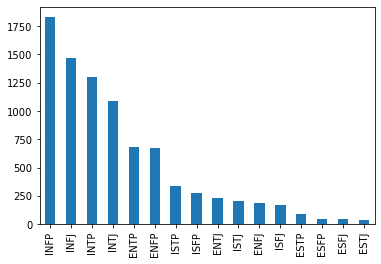

In [26]:
dist_personality.plot(kind='bar')

In [27]:
# from first glance it seems we have more introverts in this sample.

In [28]:
# instead of just removing links we reconned that introverts might have more time online and a way to get 
# that from the data could be to get amount of links shared by each person and compare the distribution 
# neglecting outliers of course. # number of mentions we feel won't reflect online presence since everyone
# has 50 posts from the data collectiong as given in the description in kaggle and we can't exactly say
# introverts mention people the most. So another feature could be no of links shared.

In [29]:
def online_frequency(col):
    '''This function gets the count of links shared in all of the persons post'''
    url_pattern = re.compile(r'(https?:/?/?|ftp:/?/?|www|[yY]outube)+?[\w\-\?\=\%.]+?.[\w\!\£\$\%\^\&\*\(\)\_\+\-\=\{\\}\~\[\]\#\:\@\;\'\<\>\?\,\.\/\\]+')
    site_visits= []
    count = 0
    for p in col:
        url_match = url_pattern.finditer(p)
        for url_mat in url_match:
            count +=1
        site_visits.append(count)
        count= 0
    return site_visits


In [30]:
personality['online_freq'] = online_frequency(personality.posts)

In [31]:
# distribution of online_frequency to verify our thesis.

In [32]:
personality.head()

type                                              posts  online_freq
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...           24
1  ENTP  'I'm finding the lack of me in these posts ver...            9
2  INTP  'Good one  _____   https://www.youtube.com/wat...            5
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...            2
4  ENTJ  You're fired.|||That's another silly misconcep...            6

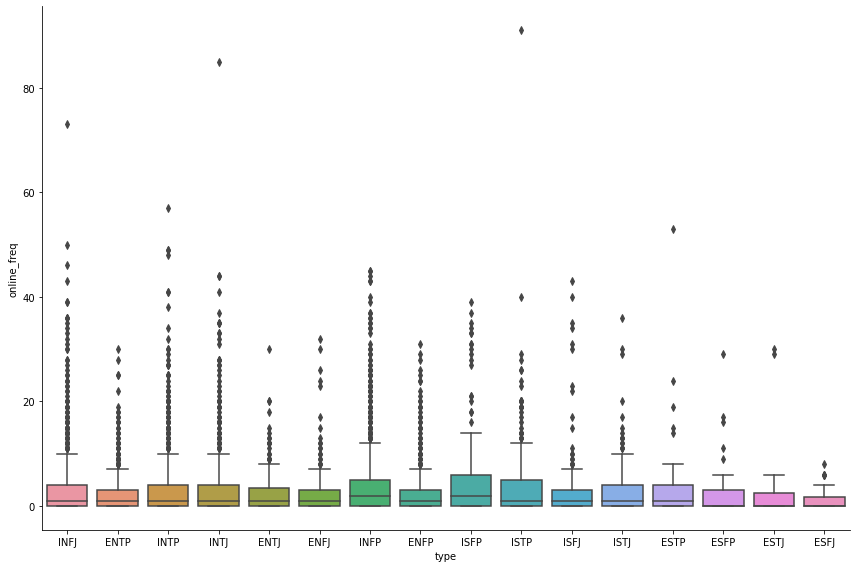

In [33]:
# Distribution of assumed online activity.
sns.catplot('type', 'online_freq', kind= 'box', data= personality, height= 8, aspect=1.5, )

In [34]:
# we actually notice smaller distributions among extroverts but this could just be due to the fact that they
# are less in the sample but why are they less ?. As extroversion implies they prefer the outside world.

In [35]:
# let's generalize more 
def intro_extro(text):
    if 'I' in text:
        return 'Introversion'
    else:
        return 'Extroversion'

In [36]:
personality['Intro_extro'] = personality.type.apply(intro_extro)

In [37]:
personality.head()

type                                              posts  online_freq  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...           24   
1  ENTP  'I'm finding the lack of me in these posts ver...            9   
2  INTP  'Good one  _____   https://www.youtube.com/wat...            5   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...            2   
4  ENTJ  You're fired.|||That's another silly misconcep...            6   

    Intro_extro  
0  Introversion  
1  Extroversion  
2  Introversion  
3  Introversion  
4  Extroversion

In [38]:
# let's get a clearer view of ratio of introverts to extroverts
personality['Intro_extro'].value_counts(normalize= True)

Introversion    0.769568
Extroversion    0.230432
Name: Intro_extro, dtype: float64

we have 77% of introverts in the dataset, that's imbalanced

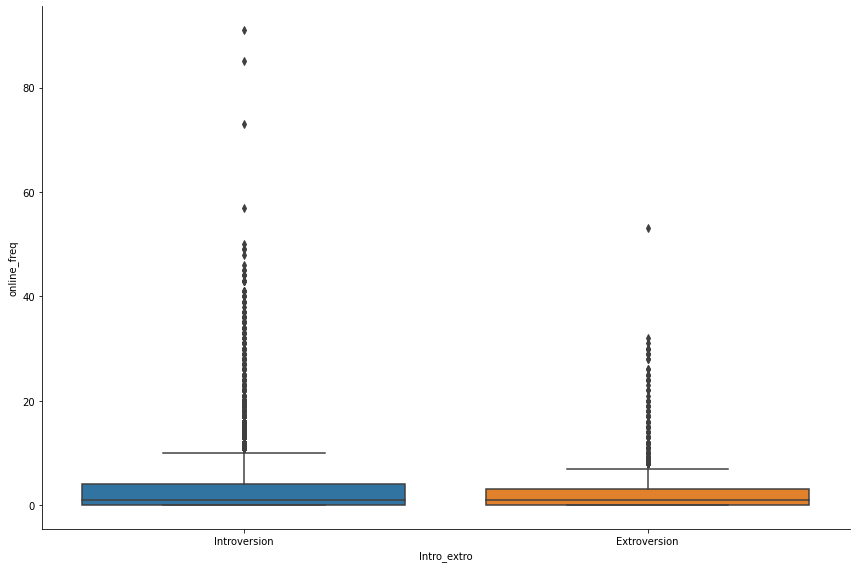

In [39]:
# better distribution of assumed online activity
sns.catplot('Intro_extro', 'online_freq', kind= 'box', data= personality, height= 8, aspect=1.5)

In [40]:
# wanted to verify the outliers to be sure the regex did the right thing.
personality[personality.online_freq >80]
# manually checking the data we see that these posts indeed contain soo many links.

type                                              posts  online_freq  \
382  ISTP  'Rough. Trade.|||https://www.youtube.com/watch...           91   
521  INTJ  'I'm bored as hell and there isn't anything to...           85   

      Intro_extro  
382  Introversion  
521  Introversion

([<matplotlib.axis.XTick at 0x1c0fd0b1760>,
 <a list of 20 Text major ticklabel objects>)

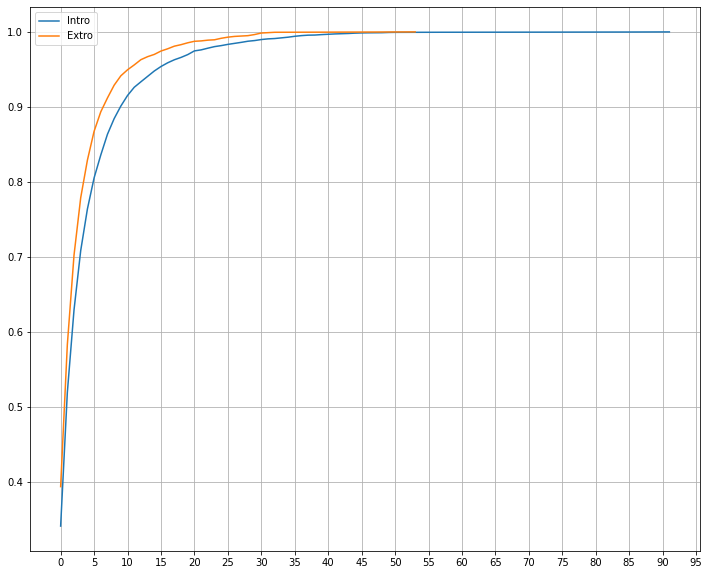

In [43]:
# A cdf will be better
plt.figure(figsize=(12,10))
intro = emd.Cdf.from_seq(personality[personality.Intro_extro == 'Introversion']['online_freq'])
extro = emd.Cdf.from_seq(personality[personality.Intro_extro == 'Extroversion']['online_freq'])

intro.plot(label= 'Intro')
extro.plot(label= 'Extro')
plt.legend()
plt.grid()
plt.xticks(list(range(0, 100, 5)))

In [44]:
# viewing the 90th percentiles
print(intro.inverse(0.90))
extro.inverse(0.9)

# basically this means at the 90% of introverts share <= 9 links and 90% extroverts share <= 7 links.

9.0


array(7.)

In [45]:
# It seems that neglecting outliers the introverts have a very slightly higher online freq. This could just 
# be due to the fact that they are more in the dataset or it could be that comparing with only the introversion
# and extroversion trait isn't good enough. Generally we can't really say it show online dominance of 
# introverts. 

In [46]:
# some other question asked could be do intoverts or some class of personalities post longer texts than 
# others ?

In [47]:
# To get that, we do some cleaning.
personality = remlinks_symbs(personality)


In [48]:
personality.post = personality.post.apply(rem_pos)

In [49]:
personality.tail()

type                                              posts  online_freq  \
8670  ISFP  'https://www.youtube.com/watch?v=t8edHB_h908||...            7   
8671  ENFP  'So...if this thread already exists someplace ...            2   
8672  INTP  'So many questions when i do these things.  I ...            2   
8673  INFP  'I am very conflicted right now when it comes ...            0   
8674  INFP  'It has been too long since I have been on per...            3   

       Intro_extro                                               post  
8670  Introversion   |||ixfp just because i always think of cats a...  
8671  Extroversion  so if this thread already exists someplace els...  
8672  Introversion  so many questions when i do these things i wou...  
8673  Introversion  i am very conflicted right now when it comes t...  
8674  Introversion  it has been too long since i have been on pers...

In [50]:
# some posts aren't up to 50. We observed that when we debugged the error gotten from the function below.
t = personality.post[774]

In [51]:
t

"says you he's not cute he's pure evil in miniature form when he takes over the world we will be forced to have mexican hat day every 5th of the month those not wearing a mexican hat "

In [52]:
def length_of_posts(post, total_length = False):
    new_post = []
    len_of_post = []
    value = 0
# basically, we loop through the bunch of text and using the find all, we find every text till we get
# to the seperator(|||), so that's one sentence. Then we remove the seperator{|||} and split words in each
# sentence, then do a count.
    for each_post in re.findall(r'[\w\' ]+[||]+', post):
        #print(each_post)
        each_post = each_post.replace('|', '')
        new_post.append(each_post)
    for each in new_post:
        len_of_post.append(len(each.split()))
    # we choose the average of the 25th and 75th percentiles after a few visualizations
    
    # In some cases the posts aren't up to 50 this could actually affect this feature because we would 
    # for instance in a case of two posts would be assuming that's the person's general post behaviour
    
    # we could take the number of posts as another feature to check if majority of the posts are many. 
    try:
        value = int(round((np.percentile(len_of_post, 25)+ np.percentile(len_of_post, 75))/2))
        if total_length == True:
            return len(post.split())
        else:
            return value
        
    # some have just one post, it'll be wrong to draw conclusions from that, so i'll set those to 0.
    except IndexError:
         if total_length == True:
            return len(post.split())
         else:
            return 0
        
 

In [53]:
length_of_posts(t, total_length= False)

0

In [54]:
personality.head()

type                                              posts  online_freq  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...           24   
1  ENTP  'I'm finding the lack of me in these posts ver...            9   
2  INTP  'Good one  _____   https://www.youtube.com/wat...            5   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...            2   
4  ENTJ  You're fired.|||That's another silly misconcep...            6   

    Intro_extro                                               post  
0  Introversion   ||| |||enfp and intj moments sportscenter not...  
1  Extroversion  i'm finding the lack of me in these posts very...  
2  Introversion  good one  |||of course to which i say i know t...  
3  Introversion  dear intp i enjoyed our conversation the other...  
4  Extroversion  you're fired |||that's another silly misconcep...

In [55]:
personality['len_of_posts'] = personality.post.apply(length_of_posts)

In [56]:
personality['total_len'] =  personality.post.apply(length_of_posts, total_length= True)

In [57]:
personality.head()

type                                              posts  online_freq  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...           24   
1  ENTP  'I'm finding the lack of me in these posts ver...            9   
2  INTP  'Good one  _____   https://www.youtube.com/wat...            5   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...            2   
4  ENTJ  You're fired.|||That's another silly misconcep...            6   

    Intro_extro                                               post  \
0  Introversion   ||| |||enfp and intj moments sportscenter not...   
1  Extroversion  i'm finding the lack of me in these posts very...   
2  Introversion  good one  |||of course to which i say i know t...   
3  Introversion  dear intp i enjoyed our conversation the other...   
4  Extroversion  you're fired |||that's another silly misconcep...   

   len_of_posts  total_len  
0             9        613  
1            26       1238  
2            21        882  
3            22       1114  
4            20       1022

In [58]:
# This takes time to run but this basically writes all the code into a txt file which we then used to 
# manually check that the cleaning function did the right thing.
'''string = ''
with open('All1.txt', 'w', encoding='utf-8') as file:
    for text in personality.post:
        string += text+' '
    file.write(string)'''


"string = ''\nwith open('All1.txt', 'w', encoding='utf-8') as file:\n    for text in personality.post:\n        string += text+' '\n    file.write(string)"

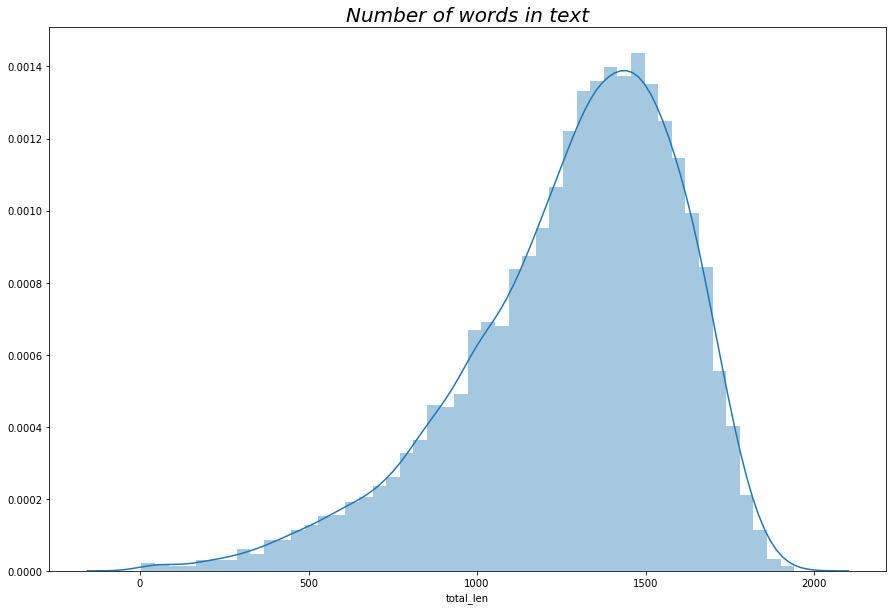

In [59]:
plt.figure(figsize=(15,10))
sns.distplot(personality['total_len'],label='Data word length')
plt.title('Number of words in text',fontdict={'size':20,'style':'italic'})
plt.show()

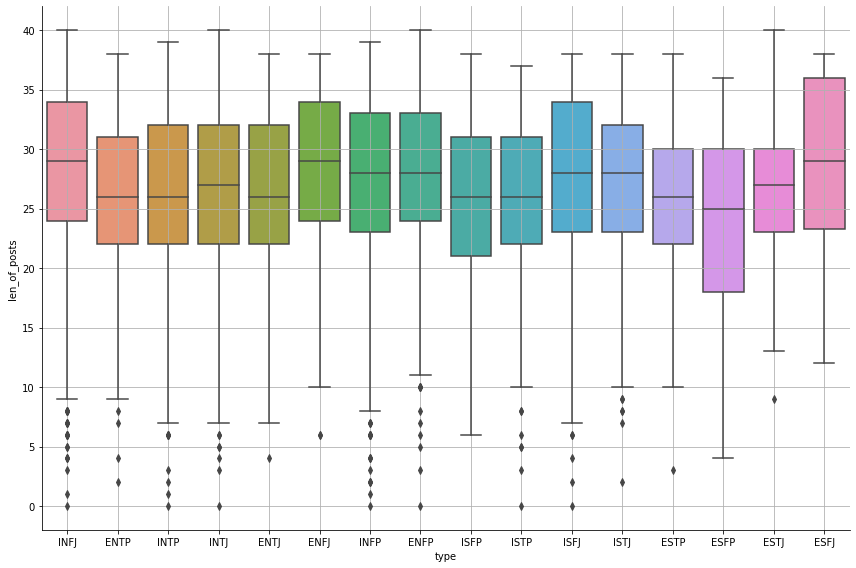

In [60]:
# boxplot of the length of user post
sns.catplot('type', 'len_of_posts', kind= 'box', data= personality, height= 8, aspect=1.5)
plt.grid()

In [61]:
# There's really no significant difference except for Esfp. For example entp and infj. Entp has a median of
# about 26words infj has of about 29, so a difference of three. So generally some groups have slightly
# lower no of words.

# But Esfp seems to have the lowest distribution but they are also small in the data set, but they 
# aren't the smallest estj and esfp are around the same number in the dataset so it can't really say their
# amountin the dataset is a reason maybe that group actually don't post much.

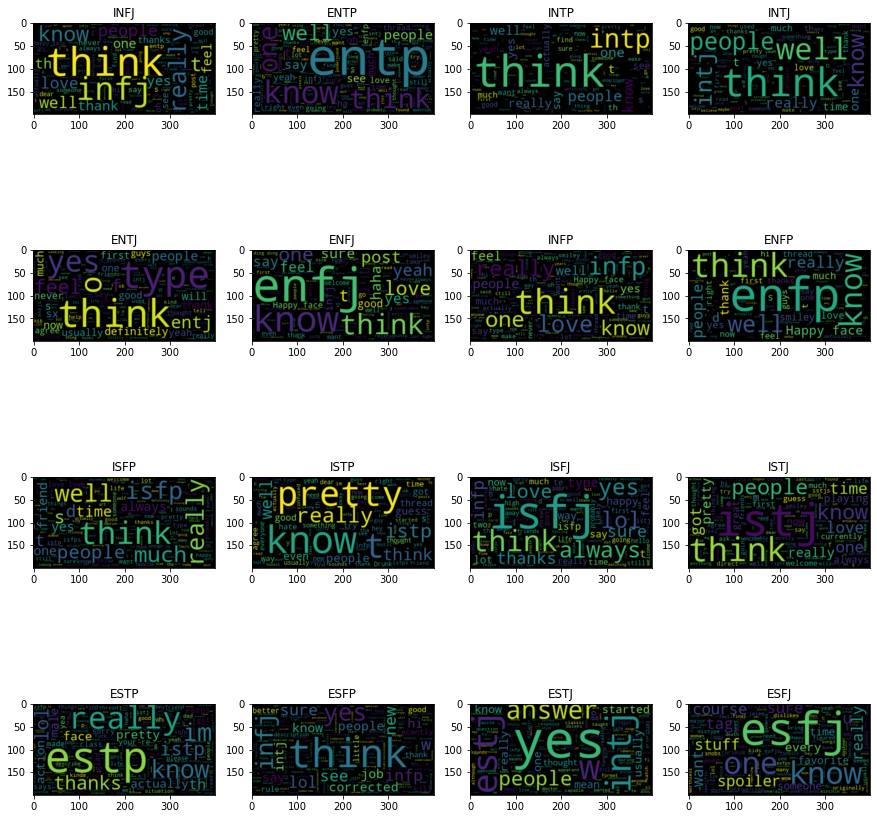

In [62]:
# common words across personality types.
fig, ax = plt.subplots(len(personality['type'].unique()), sharex=True, figsize=(15,len(personality['type'].unique())))
k = 0
for i in personality['type'].unique():
    df_4 = personality[personality['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['post']
                                                                                              .to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1
plt.savefig('gg', dpi= 500, quality= 98)

# Getting our final Train and test data

In [63]:
labenc = LabelEncoder()

In [64]:
personality['type_encoded'] = labenc.fit_transform(personality.type)

In [65]:
# Scaling the two new features since tfidf scales the token values.
min_maxf = MinMaxScaler()
min_maxp = MinMaxScaler()

personality['onlin_f'] = min_maxf.fit_transform(personality[['online_freq']])
personality['len_of_p'] = min_maxp.fit_transform(personality[['len_of_posts']])


In [66]:
X_train, X_test, y_train, y_test = train_test_split(personality.drop(['online_freq', 'len_of_posts']
                                                                     , axis= 1),   personality.type_encoded, 
                                                    test_size=0.3, random_state=42,
                                                    stratify= personality.type_encoded)
                                                  

In [67]:
# using the stratify parameter we basically do a stratified split. So distribution of personality type 
# remains the same as in original dataset
y_train.value_counts(normalize= True)

9     0.211133
8     0.169466
11    0.150362
10    0.125823
3     0.078887
1     0.077734
15    0.038867
13    0.031291
2     0.026680
14    0.023715
0     0.021904
12    0.019104
7     0.010211
5     0.005599
4     0.004776
6     0.004447
Name: type_encoded, dtype: float64

In [68]:
# the len_of_p feature betters our model
new_features = ['onlin_f','len_of_p']

In [69]:
 nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chigozie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Chigozie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [71]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Chigozie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
%%time
# Here we just call the bow function on xtrain and xtest and it does the cleaning and vectorizing.
train_test = BOW(X_train, X_test, split_data= True)

Wall time: 17min 24s


In [73]:
train_vector = train_test[0]

In [74]:
X_train

type                                              posts   Intro_extro  \
3328  INFP  'I think that it's a little bit of both. While...  Introversion   
5570  INFJ  'Congrats man. Hope everything is well!|||6/10...  Introversion   
2108  INFP  'People do this with me as well. I have had pr...  Introversion   
5991  ESFJ  'Thanks to ISFJs, who are fantastic listeners ...  Extroversion   
2337  INTJ  'I think that's why I wound up overwhelming my...  Introversion   
...    ...                                                ...           ...   
7871  INFP  'I used to be less confused when in a state of...  Introversion   
1158  INTJ  'Oh thank you very much for the advice !!|||I ...  Introversion   
5581  ENTJ  'So I didn't see the sticky with the format fo...  Extroversion   
8629  INTP  'A chimichanga.|||Hello, dear fellow café-memb...  Introversion   
7403  ESFJ  'About to shower and then make grilled cheese....  Extroversion   

                                                   post  total_len  \
3328  i think that it's a little bit of both while a...       1448   
5570  congrats man hope everything is well 6 aye pir...        605   
2108  people do this with me as well i have had prof...        806   
5991  thanks to isfjs who are fantastic listeners an...       1638   
2337  i think that's why i wound up overwhelming mys...       1528   
...                                                 ...        ...   
7871  i used to be less confused when in a state of ...       1168   
1158  oh thank you very much for the advice i feel l...       1142   
5581  so i didn't see the sticky with the format for...       1617   
8629  a chimichanga hello dear fellow café members l...        795   
7403  about to shower and then make grilled cheese a...       1288   

      type_encoded   onlin_f  len_of_p  
3328             9  0.021978     0.750  
5570             8  0.131868     0.275  
2108             9  0.263736     0.350  
5991             4  0.000000     0.850  
2337            10  0.032967     0.825  
...            ...       ...       ...  
7871             9  0.120879     0.550  
1158            10  0.043956     0.575  
5581             2  0.021978     0.875  
8629            11  0.043956     0.500  
7403             4  0.010989     0.650  

[6072 rows x 8 columns]

In [75]:
# adding other two features to train
train_vector = pd.concat([train_vector, X_train[new_features].reset_index().drop('index', axis= 1)], 
                         axis= 1)

In [76]:
train_vector.columns[:100]

Index([''cause', ''em', ''i', ''s', ''the', '0', '1', '1st', '1w2', '1w9', '2',
       '2nd', '2w1', '2w3', '3', '3rd', '3w2', '3w4', '4', '4th', '4w3', '4w5',
       '5', '5w4', '5w6', '6', '6w5', '6w7', '7', '7w6', '7w8', '8', '8w7',
       '8w9', '9', '9w1', '9w8', 'abandon', 'ability', 'able', 'absolute',
       'absolutely', 'absorb', 'abstract', 'absurd', 'abuse', 'abusive',
       'academic', 'accent', 'accept', 'acceptable', 'acceptance', 'access',
       'accident', 'accidentally', 'accomplish', 'accord', 'account',
       'accuracy', 'accurate', 'accurately', 'accuse', 'achieve',
       'achievement', 'acknowledge', 'acquaintance', 'acquire', 'across',
       'act', 'action', 'active', 'actively', 'activity', 'actor', 'actual',
       'actually', 'ad', 'adapt', 'add', 'addict', 'addiction', 'addition',
       'address', 'adhd', 'adjust', 'admire', 'admit', 'adopt', 'adorable',
       'adore', 'adult', 'advance', 'advanced', 'advantage', 'adventure',
       'adventurous', 'adv

In [77]:
test_vector = train_test[1]

In [78]:
# adding other two features to test
test_vector = pd.concat([test_vector, X_test[new_features].reset_index().drop('index', axis= 1)], 
                         axis= 1)

In [79]:
test_vector.head()

'cause  'em   'i   's  'the         0         1  1st       1w2  1w9  ...  \
0     0.0  0.0  0.0  0.0   0.0  0.000000  0.017662  0.0  0.000000  0.0  ...   
1     0.0  0.0  0.0  0.0   0.0  0.000000  0.000000  0.0  0.000000  0.0  ...   
2     0.0  0.0  0.0  0.0   0.0  0.040934  0.036198  0.0  0.000000  0.0  ...   
3     0.0  0.0  0.0  0.0   0.0  0.000000  0.000000  0.0  0.000000  0.0  ...   
4     0.0  0.0  0.0  0.0   0.0  0.000000  0.078331  0.0  0.062198  0.0  ...   

   youtube   yr  yup    z      zero  zodiac  zombie      zone   onlin_f  \
0      0.0  0.0  0.0  0.0  0.000000     0.0     0.0  0.000000  0.000000   
1      0.0  0.0  0.0  0.0  0.000000     0.0     0.0  0.000000  0.087912   
2      0.0  0.0  0.0  0.0  0.051778     0.0     0.0  0.000000  0.000000   
3      0.0  0.0  0.0  0.0  0.000000     0.0     0.0  0.054117  0.021978   
4      0.0  0.0  0.0  0.0  0.000000     0.0     0.0  0.000000  0.010989   

   len_of_p  
0     0.725  
1     0.350  
2     0.700  
3     0.650  
4     0.650  

[5 rows x 3502 columns]

## MODELLING

In [80]:
def class_report(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict= True)
    report_df = pd.DataFrame(report).transpose()
    n = list(labenc.inverse_transform([int(c) for c in list(report_df.index[:16])]))
    n.append('accuracy')
    n.append('macro avg')
    n.append('weighted avg')
    report_df.index = n
    return report_df

# XGBOOST

In [115]:
xg = XGBClassifier()

In [117]:
%%time
xg.fit(train_vector, y_train)

CPU times: user 18min 11s, sys: 1.25 s, total: 18min 13s
Wall time: 18min 8s


XGBClassifier(colsample_bytree=0.8, max_depth=6, objective='multi:softprob',
              scale_pos_weight=15)

In [118]:
xg_pred = xg.predict(test_vector)

In [119]:
class_report(y_test, xg_pred)

precision    recall  f1-score      support
ENFJ           0.615385  0.280702  0.385542    57.000000
ENFP           0.710983  0.605911  0.654255   203.000000
ENTJ           0.818182  0.391304  0.529412    69.000000
ENTP           0.623188  0.626214  0.624697   206.000000
ESFJ           1.000000  0.230769  0.375000    13.000000
ESFP           1.000000  0.071429  0.133333    14.000000
ESTJ           1.000000  0.166667  0.285714    12.000000
ESTP           0.545455  0.222222  0.315789    27.000000
INFJ           0.656566  0.736961  0.694444   441.000000
INFP           0.641940  0.818182  0.719424   550.000000
INTJ           0.649068  0.639144  0.644068   327.000000
INTP           0.690698  0.759591  0.723508   391.000000
ISFJ           0.703704  0.380000  0.493506    50.000000
ISFP           0.630435  0.358025  0.456693    81.000000
ISTJ           0.750000  0.442623  0.556701    61.000000
ISTP           0.666667  0.594059  0.628272   101.000000
accuracy       0.661929  0.661929  0.661929     0.661929
macro avg      0.731392  0.457738  0.513773  2603.000000
weighted avg   0.669312  0.661929  0.650488  2603.000000

In [120]:
# Tuning xgboost
xg_param = {'max_depth':[6,10], 'learning_rate':[0.1,0.3], 'gamma':[0.2, 0.4], 'scale_pos_weight':[15,20]}

In [124]:
xg_grid = RandomizedSearchCV(XGBClassifier(colsample_bytree= 0.8, n_jobs= -1), xg_param, cv= 2)

In [125]:
xg_grid.fit(train_vector, y_train)

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(colsample_bytree=0.8, n_jobs=-1),
                   param_distributions={'gamma': [0.2, 0.4],
                                        'learning_rate': [0.1, 0.3],
                                        'max_depth': [6, 10],
                                        'scale_pos_weight': [15, 20]})

In [126]:
 xg_grid.best_estimator_

XGBClassifier(colsample_bytree=0.8, gamma=0.2, max_depth=6, n_jobs=-1,
              objective='multi:softprob', scale_pos_weight=15)

In [128]:
grid_pred = xg_grid.predict(test_vector)

In [129]:
class_report(y_test, grid_pred)

precision    recall  f1-score      support
ENFJ           0.600000  0.263158  0.365854    57.000000
ENFP           0.688889  0.610837  0.647520   203.000000
ENTJ           0.750000  0.347826  0.475248    69.000000
ENTP           0.635000  0.616505  0.625616   206.000000
ESFJ           1.000000  0.153846  0.266667    13.000000
ESFP           1.000000  0.071429  0.133333    14.000000
ESTJ           1.000000  0.250000  0.400000    12.000000
ESTP           0.545455  0.222222  0.315789    27.000000
INFJ           0.671429  0.746032  0.706767   441.000000
INFP           0.651297  0.821818  0.726688   550.000000
INTJ           0.640244  0.642202  0.641221   327.000000
INTP           0.674365  0.746803  0.708738   391.000000
ISFJ           0.724138  0.420000  0.531646    50.000000
ISFP           0.659091  0.358025  0.464000    81.000000
ISTJ           0.731707  0.491803  0.588235    61.000000
ISTP           0.677778  0.603960  0.638743   101.000000
accuracy       0.663081  0.663081  0.663081     0.663081
macro avg      0.728087  0.460404  0.514754  2603.000000
weighted avg   0.668599  0.663081  0.651306  2603.000000

## RandomForestClassifier.

In [81]:
rand_f = RandomForestClassifier()

In [82]:
rand_f.fit(train_vector, y_train)

RandomForestClassifier()

In [83]:
rf_pred = rand_f.predict(test_vector)

In [84]:
class_report(y_test, rf_pred)

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



precision    recall  f1-score     support
ENFJ           1.000000  0.087719  0.161290    57.00000
ENFP           0.756098  0.305419  0.435088   203.00000
ENTJ           1.000000  0.028986  0.056338    69.00000
ENTP           0.656627  0.529126  0.586022   206.00000
ESFJ           0.000000  0.000000  0.000000    13.00000
ESFP           0.000000  0.000000  0.000000    14.00000
ESTJ           0.000000  0.000000  0.000000    12.00000
ESTP           0.000000  0.000000  0.000000    27.00000
INFJ           0.530648  0.687075  0.598814   441.00000
INFP           0.487578  0.856364  0.621372   550.00000
INTJ           0.620130  0.584098  0.601575   327.00000
INTP           0.628510  0.744246  0.681499   391.00000
ISFJ           0.000000  0.000000  0.000000    50.00000
ISFP           1.000000  0.024691  0.048193    81.00000
ISTJ           1.000000  0.016393  0.032258    61.00000
ISTP           0.810811  0.297030  0.434783   101.00000
accuracy       0.563580  0.563580  0.563580     0.56358
macro avg      0.530650  0.260072  0.266077  2603.00000
weighted avg   0.610587  0.563580  0.515145  2603.00000

## Adaboost classifier

In [100]:
ada = AdaBoostClassifier()

In [101]:
ada.fit(train_vector, y_train)

AdaBoostClassifier()

In [102]:
ada_pred = ada.predict(test_vector)

In [103]:
class_report(y_test, ada_pred)

precision    recall  f1-score      support
ENFJ           0.152174  0.368421  0.215385    57.000000
ENFP           0.523013  0.615764  0.565611   203.000000
ENTJ           0.476923  0.449275  0.462687    69.000000
ENTP           0.500000  0.048544  0.088496   206.000000
ESFJ           0.000000  0.000000  0.000000    13.000000
ESFP           0.250000  0.142857  0.181818    14.000000
ESTJ           0.266667  0.333333  0.296296    12.000000
ESTP           0.545455  0.444444  0.489796    27.000000
INFJ           0.212318  0.594104  0.312836   441.000000
INFP           0.612033  0.536364  0.571705   550.000000
INTJ           0.250000  0.009174  0.017699   327.000000
INTP           0.209677  0.033248  0.057395   391.000000
ISFJ           0.436364  0.480000  0.457143    50.000000
ISFP           0.387097  0.444444  0.413793    81.000000
ISTJ           0.365079  0.377049  0.370968    61.000000
ISTP           0.549451  0.495050  0.520833   101.000000
accuracy       0.349981  0.349981  0.349981     0.349981
macro avg      0.358516  0.335755  0.313904  2603.000000
weighted avg   0.383059  0.349981  0.310723  2603.000000

## Bagging Classifier

In [85]:
bag = BaggingClassifier()

In [86]:
bag.fit(train_vector, y_train)

BaggingClassifier()

In [87]:
bag_pred = bag.predict(test_vector)

In [88]:
class_report(y_test, bag_pred)


C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



precision    recall  f1-score      support
ENFJ           0.388889  0.122807  0.186667    57.000000
ENFP           0.567442  0.600985  0.583732   203.000000
ENTJ           0.500000  0.231884  0.316832    69.000000
ENTP           0.546341  0.543689  0.545012   206.000000
ESFJ           0.000000  0.000000  0.000000    13.000000
ESFP           0.000000  0.000000  0.000000    14.000000
ESTJ           0.000000  0.000000  0.000000    12.000000
ESTP           0.625000  0.185185  0.285714    27.000000
INFJ           0.578450  0.693878  0.630928   441.000000
INFP           0.602056  0.745455  0.666125   550.000000
INTJ           0.596386  0.605505  0.600910   327.000000
INTP           0.633971  0.677749  0.655130   391.000000
ISFJ           0.560000  0.280000  0.373333    50.000000
ISFP           0.760000  0.234568  0.358491    81.000000
ISTJ           0.645161  0.327869  0.434783    61.000000
ISTP           0.686747  0.564356  0.619565   101.000000
accuracy       0.595851  0.595851  0.595851     0.595851
macro avg      0.480653  0.363371  0.391076  2603.000000
weighted avg   0.587277  0.595851  0.578198  2603.000000

## Logistic Regression

In [89]:
 log_reg = LogisticRegression()

In [90]:
log_reg.fit(train_vector, y_train)

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [91]:
log_pred =log_reg.predict(test_vector)

In [92]:
class_report(y_test, log_pred)

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



precision    recall  f1-score      support
ENFJ           0.714286  0.175439  0.281690    57.000000
ENFP           0.723684  0.541872  0.619718   203.000000
ENTJ           0.625000  0.217391  0.322581    69.000000
ENTP           0.674699  0.543689  0.602151   206.000000
ESFJ           1.000000  0.076923  0.142857    13.000000
ESFP           0.000000  0.000000  0.000000    14.000000
ESTJ           0.000000  0.000000  0.000000    12.000000
ESTP           1.000000  0.074074  0.137931    27.000000
INFJ           0.635644  0.727891  0.678647   441.000000
INFP           0.609079  0.878182  0.719285   550.000000
INTJ           0.626404  0.681957  0.653001   327.000000
INTP           0.666667  0.787724  0.722157   391.000000
ISFJ           0.750000  0.180000  0.290323    50.000000
ISFP           0.840000  0.259259  0.396226    81.000000
ISTJ           0.722222  0.213115  0.329114    61.000000
ISTP           0.726027  0.524752  0.609195   101.000000
accuracy       0.645793  0.645793  0.645793     0.645793
macro avg      0.644607  0.367642  0.406555  2603.000000
weighted avg   0.658268  0.645793  0.619570  2603.000000

In [93]:
# Randomized search cv for logreg

In [94]:
params={'C':[2.2, 2.4, 2.6], 'class_weight':['balanced']}

In [95]:
randomized_log = RandomizedSearchCV(LogisticRegression(), params, cv= 3)

In [96]:
randomized_log.fit(train_vector, y_train)

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning:

The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org

RandomizedSearchCV(cv=3, estimator=LogisticRegression(),
                   param_distributions={'C': [2.2, 2.4, 2.6],
                                        'class_weight': ['balanced']})

In [97]:
randomized_log.best_estimator_

LogisticRegression(C=2.2, class_weight='balanced')

In [98]:
log_ran = randomized_log.predict(test_vector)

In [99]:
class_report(y_test, log_ran)

precision    recall  f1-score      support
ENFJ           0.500000  0.614035  0.551181    57.000000
ENFP           0.652632  0.610837  0.631043   203.000000
ENTJ           0.455556  0.594203  0.515723    69.000000
ENTP           0.613208  0.631068  0.622010   206.000000
ESFJ           0.428571  0.461538  0.444444    13.000000
ESFP           0.062500  0.071429  0.066667    14.000000
ESTJ           0.625000  0.416667  0.500000    12.000000
ESTP           0.576923  0.555556  0.566038    27.000000
INFJ           0.758974  0.671202  0.712395   441.000000
INFP           0.755258  0.718182  0.736253   550.000000
INTJ           0.661392  0.639144  0.650078   327.000000
INTP           0.745501  0.741688  0.743590   391.000000
ISFJ           0.607143  0.680000  0.641509    50.000000
ISFP           0.537634  0.617284  0.574713    81.000000
ISTJ           0.547945  0.655738  0.597015    61.000000
ISTP           0.562044  0.762376  0.647059   101.000000
accuracy       0.671533  0.671533  0.671533     0.671533
macro avg      0.568143  0.590059  0.574982  2603.000000
weighted avg   0.680071  0.671533  0.673859  2603.000000

In [ ]:
 #Logistics regression performs quite well and fast

## Support Vector machine

In [104]:
supp_vec = SVC()

In [105]:
supp_vec.fit(train_vector, y_train)

SVC()

In [106]:
supp_pred = supp_vec.predict(test_vector)

In [107]:
class_report(y_test, supp_pred)

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Chigozie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



precision    recall  f1-score      support
ENFJ           0.684211  0.228070  0.342105    57.000000
ENFP           0.743056  0.527094  0.616715   203.000000
ENTJ           0.652174  0.217391  0.326087    69.000000
ENTP           0.693750  0.538835  0.606557   206.000000
ESFJ           1.000000  0.153846  0.266667    13.000000
ESFP           0.000000  0.000000  0.000000    14.000000
ESTJ           0.000000  0.000000  0.000000    12.000000
ESTP           0.750000  0.111111  0.193548    27.000000
INFJ           0.629787  0.671202  0.649835   441.000000
INFP           0.566308  0.861818  0.683490   550.000000
INTJ           0.625378  0.633028  0.629179   327.000000
INTP           0.656716  0.787724  0.716279   391.000000
ISFJ           0.882353  0.300000  0.447761    50.000000
ISFP           0.818182  0.333333  0.473684    81.000000
ISTJ           0.772727  0.278689  0.409639    61.000000
ISTP           0.722222  0.514851  0.601156   101.000000
accuracy       0.632731  0.632731  0.632731     0.632731
macro avg      0.637304  0.384812  0.435169  2603.000000
weighted avg   0.650002  0.632731  0.612985  2603.000000

## Gradient Boosting 

In [ ]:
grad_b = GradientBoostingClassifier()

In [ ]:
grad_b.fit(train_vector, y_train)

In [ ]:
grad_pred = grad_b.predict(test_vector)

In [ ]:
class_report(y_test, grad_pred)

## Light Gradient boosting

In [ ]:
lgb = LGBMClassifier()

In [ ]:
lgb.fit(train_vector, y_train)

In [ ]:
lgb_pred = lgb.predict(test_vector)

In [ ]:
class_report(y_test, lgb_pred)